# Supervised Learning Demo: Iris Flower Classification

## 🎯 Problem Statement

**The Challenge**: A botanist has collected measurements of iris flowers but needs an automated way to identify the species. Manual classification is time-consuming and prone to human error, especially when dealing with hundreds of samples.

**What We're Solving**: Build an intelligent system that can automatically classify iris flowers into their correct species (Setosa, Versicolor, or Virginica) based on four physical measurements:
- Sepal length and width
- Petal length and width

**Real-World Impact**: This type of classification system is used in:
- Botanical research and species identification
- Agricultural quality control
- Biodiversity monitoring
- Educational tools for biology students

## 🎯 Demo Objectives

By the end of this notebook, you will:

1. **Understand the Problem**: Learn how to frame a real-world classification challenge
2. **Master Data Preparation**: Explore, visualize, and prepare data for machine learning
3. **Apply Supervised Learning**: Train models to learn from labeled examples
4. **Compare Algorithms**: Understand when to use Logistic Regression vs Random Forest
5. **Evaluate Performance**: Measure and interpret model accuracy and reliability
6. **Make Predictions**: Use trained models to classify new, unseen flowers
7. **Visualize Decision Boundaries**: See how models separate different classes

## 🤔 Why Supervised Learning?

**Supervised learning is perfect for this problem because**:

✅ **We have labeled data**: Each flower sample comes with its known species (the "ground truth")

✅ **Clear input-output relationship**: Physical measurements (input) → Species classification (output)

✅ **Pattern recognition task**: We want the model to learn the relationship between measurements and species

✅ **Predictive goal**: Once trained, we want to classify new flowers we haven't seen before

## 🌳 Why Random Forest Classifier?

**Random Forest is excellent for this classification task because**:

🎯 **Handles multiple features well**: Can effectively use all 4 measurements simultaneously

🎯 **Robust to outliers**: Won't be thrown off by unusual flower measurements

🎯 **Feature importance**: Tells us which measurements are most important for classification

🎯 **Non-linear relationships**: Can capture complex patterns between measurements and species

🎯 **Confidence scores**: Provides probability estimates for predictions

🎯 **Interpretable**: We can understand how decisions are made

**Comparison with Logistic Regression**:
- **Logistic Regression**: Simple, fast, assumes linear relationships
- **Random Forest**: More complex, handles non-linear patterns, ensemble method for better accuracy

Let's dive in and solve this step by step! 🚀

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Step 1: Understanding Our Data

We'll use the famous Iris dataset - it contains measurements of 150 flowers from 3 different species.

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (measurements)
y = iris.target  # Labels (species)

# Create a DataFrame for easier visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in y]

print("📊 Dataset Overview:")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(iris.feature_names)}")
print(f"Species: {list(iris.target_names)}")
print("\n🔍 First 5 rows:")
df.head()

📊 Dataset Overview:
Number of samples: 150
Number of features: 4
Species: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

🔍 First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/var/folders/wz/wk9hrzm13_jcd_4f7mlmknb80000gn/T/ipykernel_5107/448296086.py:17: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) Arial.
  plt.tight_layout()
/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


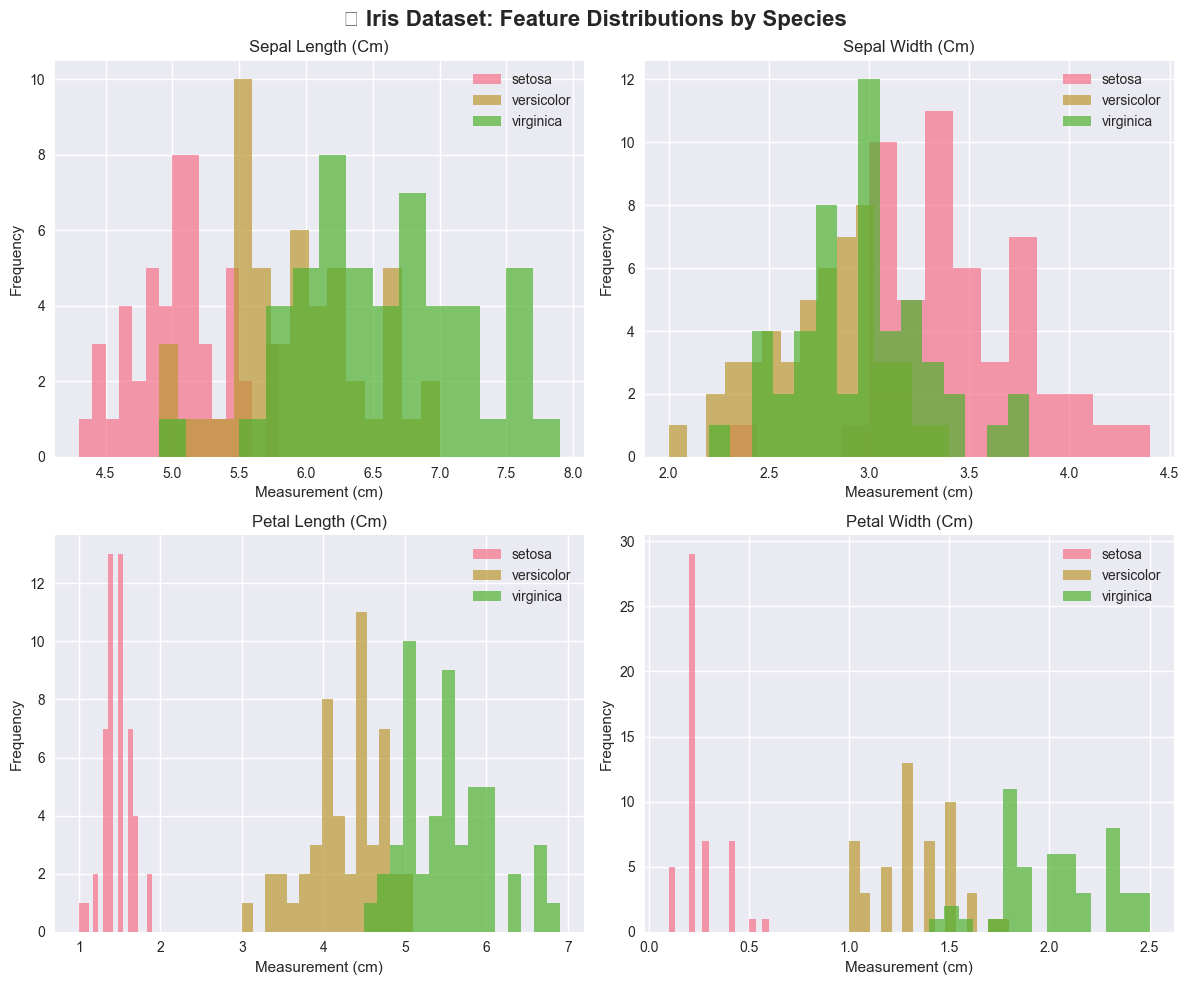

💡 Key Observation: Different species have different measurement patterns!
This is what makes supervised learning possible - patterns in the data.


In [3]:
# Visualize the data distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('🌸 Iris Dataset: Feature Distributions by Species', fontsize=16, fontweight='bold')

features = iris.feature_names
for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    for species in iris.target_names:
        data = df[df['species'] == species][feature]
        axes[row, col].hist(data, alpha=0.7, label=species, bins=15)
    
    axes[row, col].set_title(feature.replace('_', ' ').title())
    axes[row, col].set_xlabel('Measurement (cm)')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

print("💡 Key Observation: Different species have different measurement patterns!")
print("This is what makes supervised learning possible - patterns in the data.")

## Step 2: The Supervised Learning Process

### 🎯 The Goal
Given flower measurements → Predict the species

### 📚 Training vs Testing
We split our data into two parts:
- **Training set**: Used to teach the model
- **Test set**: Used to evaluate how well the model learned

📊 Data Split:
Training samples: 105 (70.0%)
Testing samples: 45 (30.0%)


/var/folders/wz/wk9hrzm13_jcd_4f7mlmknb80000gn/T/ipykernel_5107/3208678538.py:25: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/wz/wk9hrzm13_jcd_4f7mlmknb80000gn/T/ipykernel_5107/3208678538.py:25: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) Arial.
  plt.tight_layout()
/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


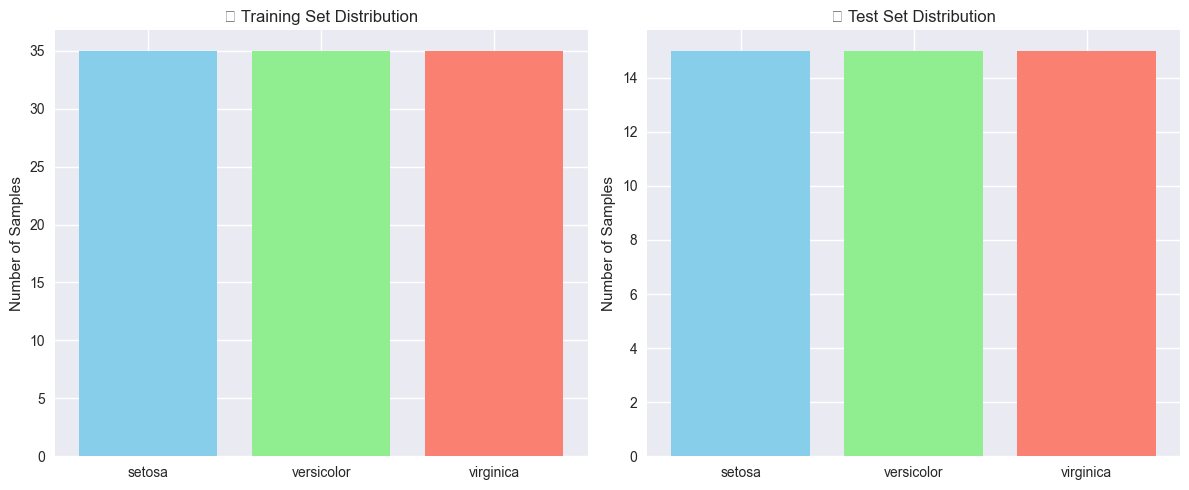


✅ Data is evenly distributed across both sets!


In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("📊 Data Split:")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

# Visualize the split
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training set
train_counts = np.bincount(y_train)
ax1.bar(iris.target_names, train_counts, color=['skyblue', 'lightgreen', 'salmon'])
ax1.set_title('🎓 Training Set Distribution')
ax1.set_ylabel('Number of Samples')

# Test set
test_counts = np.bincount(y_test)
ax2.bar(iris.target_names, test_counts, color=['skyblue', 'lightgreen', 'salmon'])
ax2.set_title('🧪 Test Set Distribution')
ax2.set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()

print("\n✅ Data is evenly distributed across both sets!")

## Step 3: Training Our First Model

Let's start with a simple but powerful algorithm: **Logistic Regression**

### How it works:
1. Finds mathematical relationships between features and labels
2. Creates decision boundaries to separate different classes
3. Uses probability to make predictions

In [5]:
# Create and train the model
print("🤖 Training Logistic Regression Model...")

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

print("✅ Model training completed!")
print("\n🧠 What the model learned:")
print("The model found mathematical patterns that connect flower measurements to species.")
print("It can now use these patterns to classify new flowers!")

🤖 Training Logistic Regression Model...
✅ Model training completed!

🧠 What the model learned:
The model found mathematical patterns that connect flower measurements to species.
It can now use these patterns to classify new flowers!


## Step 4: Making Predictions

Now let's see how our trained model performs on new, unseen data!

In [6]:
# Make predictions
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 Model Accuracy: {accuracy:.2%}")
print(f"The model correctly classified {accuracy:.1%} of the test flowers!")

# Show some example predictions
print("\n🔍 Example Predictions:")
for i in range(5):
    actual = iris.target_names[y_test[i]]
    predicted = iris.target_names[y_pred[i]]
    confidence = np.max(y_pred_proba[i]) * 100
    
    status = "✅" if actual == predicted else "❌"
    print(f"{status} Actual: {actual:12} | Predicted: {predicted:12} | Confidence: {confidence:.1f}%")

🎯 Model Accuracy: 91.11%
The model correctly classified 91.1% of the test flowers!

🔍 Example Predictions:
✅ Actual: virginica    | Predicted: virginica    | Confidence: 89.9%
✅ Actual: versicolor   | Predicted: versicolor   | Confidence: 78.9%
❌ Actual: virginica    | Predicted: versicolor   | Confidence: 62.0%
✅ Actual: versicolor   | Predicted: versicolor   | Confidence: 62.9%
✅ Actual: virginica    | Predicted: virginica    | Confidence: 61.0%


/var/folders/wz/wk9hrzm13_jcd_4f7mlmknb80000gn/T/ipykernel_5107/2507881676.py:23: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/wz/wk9hrzm13_jcd_4f7mlmknb80000gn/T/ipykernel_5107/2507881676.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


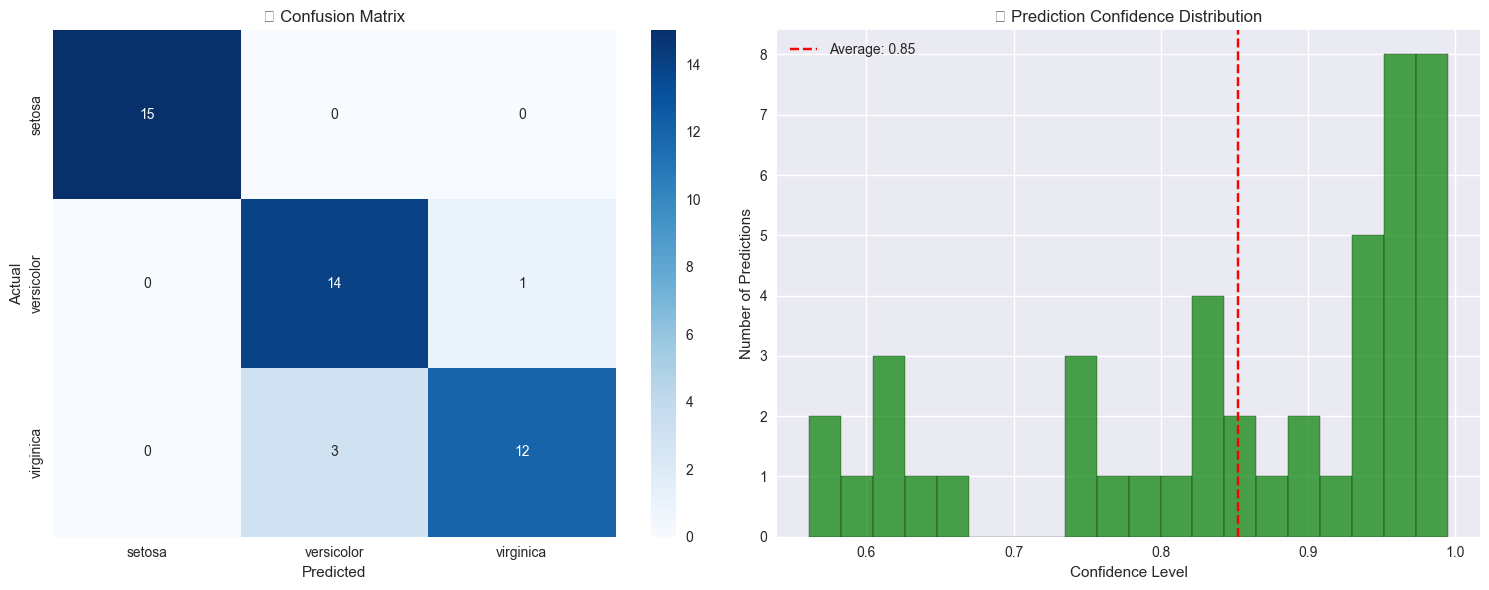


💡 Insights:
• Diagonal values in confusion matrix = correct predictions
• Higher confidence values = more certain predictions
• Average confidence: 85.3%


In [7]:
# Visualize predictions vs actual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names, ax=ax1)
ax1.set_title('🎯 Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Prediction Confidence Distribution
max_probas = np.max(y_pred_proba, axis=1)
ax2.hist(max_probas, bins=20, alpha=0.7, color='green', edgecolor='black')
ax2.set_title('📊 Prediction Confidence Distribution')
ax2.set_xlabel('Confidence Level')
ax2.set_ylabel('Number of Predictions')
ax2.axvline(np.mean(max_probas), color='red', linestyle='--', 
           label=f'Average: {np.mean(max_probas):.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n💡 Insights:")
print("• Diagonal values in confusion matrix = correct predictions")
print("• Higher confidence values = more certain predictions")
print(f"• Average confidence: {np.mean(max_probas):.1%}")

## Step 5: Comparing Different Algorithms

Now let's compare our Logistic Regression with **Random Forest Classifier**!

### 🌳 Why Random Forest for Iris Classification?

**Random Forest is perfect for our flower classification problem because**:

🎯 **Ensemble Power**: Combines predictions from multiple decision trees (100 trees by default)
- Each tree votes on the final classification
- Majority vote wins → more reliable predictions

🎯 **Handles Feature Interactions**: Can capture complex relationships between measurements
- Example: "If petal length > 4.5 AND sepal width < 3.0 → likely Virginica"
- Logistic Regression assumes linear relationships

🎯 **Robust to Outliers**: Won't be fooled by unusual flower measurements
- One weird measurement won't throw off the entire model

🎯 **Feature Importance**: Tells us which measurements matter most
- Is petal length more important than sepal width?
- Helps botanists understand what to focus on

🎯 **No Scaling Required**: Works directly with raw measurements
- Unlike Logistic Regression, doesn't need standardized features

**Trade-offs**:
- ✅ **Random Forest**: More accurate, handles complexity, feature importance
- ✅ **Logistic Regression**: Faster, simpler, more interpretable

Let's see which performs better on our iris flowers! 🌸

In [8]:
# Train Random Forest model
print("🌳 Training Random Forest Model...")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Random Forest doesn't need scaling

# Make predictions
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"✅ Random Forest Accuracy: {rf_accuracy:.2%}")

# Compare models
print("\n🏆 Model Comparison:")
print(f"Logistic Regression: {accuracy:.2%}")
print(f"Random Forest:       {rf_accuracy:.2%}")

if rf_accuracy > accuracy:
    print("🎉 Random Forest performs better!")
elif accuracy > rf_accuracy:
    print("🎉 Logistic Regression performs better!")
else:
    print("🤝 Both models perform equally well!")

🌳 Training Random Forest Model...
✅ Random Forest Accuracy: 88.89%

🏆 Model Comparison:
Logistic Regression: 91.11%
Random Forest:       88.89%
🎉 Logistic Regression performs better!


/var/folders/wz/wk9hrzm13_jcd_4f7mlmknb80000gn/T/ipykernel_5107/1382571184.py:17: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  plt.tight_layout()
/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


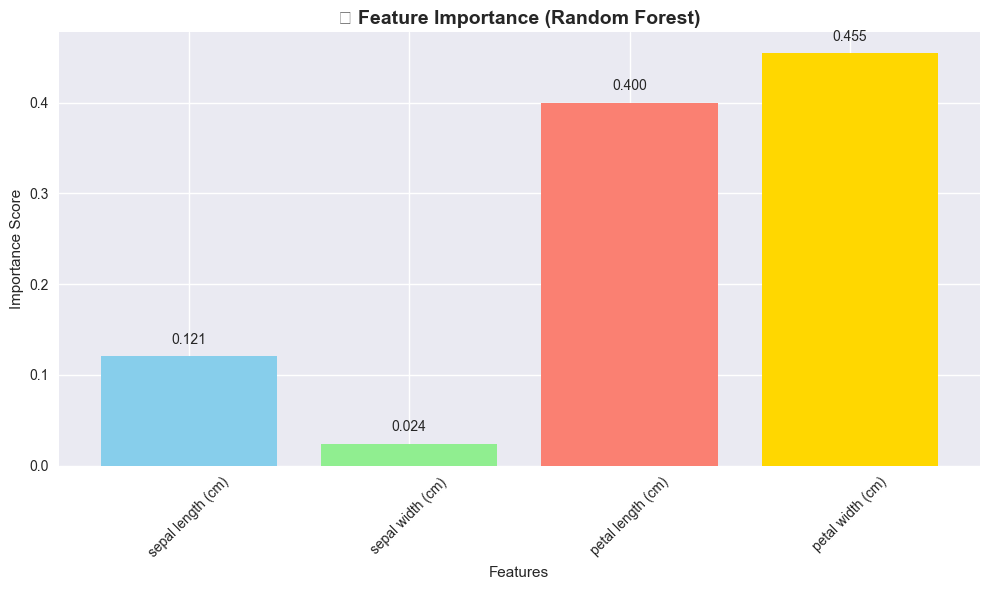


🔍 Feature Importance Insights:
• Most important feature: petal width (cm)
• This tells us which measurements are most useful for classification
• Higher importance = more discriminative power


In [9]:
# Feature importance from Random Forest
feature_importance = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
bars = plt.bar(iris.feature_names, feature_importance, 
               color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('🌟 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, importance in zip(bars, feature_importance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n🔍 Feature Importance Insights:")
most_important = iris.feature_names[np.argmax(feature_importance)]
print(f"• Most important feature: {most_important}")
print("• This tells us which measurements are most useful for classification")
print("• Higher importance = more discriminative power")
print("\n🧠 Why Feature Importance Matters:")
print("• Botanists can focus on the most distinguishing characteristics")
print("• Helps understand which physical traits separate species")
print("• Can guide future data collection - measure important features more carefully")
print("• Random Forest automatically discovers these patterns from data!")

## Step 6: Interactive Prediction

Let's create a function to predict species for any flower measurements!

In [10]:
def predict_flower_species(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predict flower species based on measurements
    """
    # Prepare the input
    measurements = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # Scale for logistic regression
    measurements_scaled = scaler.transform(measurements)
    
    # Get predictions from both models
    lr_pred = lr_model.predict(measurements_scaled)[0]
    lr_proba = lr_model.predict_proba(measurements_scaled)[0]
    
    rf_pred = rf_model.predict(measurements)[0]
    rf_proba = rf_model.predict_proba(measurements)[0]
    
    print(f"🌸 Flower Measurements:")
    print(f"   Sepal Length: {sepal_length} cm")
    print(f"   Sepal Width:  {sepal_width} cm")
    print(f"   Petal Length: {petal_length} cm")
    print(f"   Petal Width:  {petal_width} cm")
    print("\n🤖 Model Predictions:")
    print(f"   Logistic Regression: {iris.target_names[lr_pred]} ({np.max(lr_proba):.1%} confidence)")
    print(f"   Random Forest:       {iris.target_names[rf_pred]} ({np.max(rf_proba):.1%} confidence)")
    
    # Show probability breakdown
    print("\n📊 Probability Breakdown (Random Forest):")
    for i, species in enumerate(iris.target_names):
        print(f"   {species:12}: {rf_proba[i]:.1%}")

# Example predictions
print("🧪 Example Predictions:\n")

print("Example 1: Small flower")
predict_flower_species(4.5, 2.5, 1.2, 0.3)

print("\n" + "="*50 + "\n")

print("Example 2: Medium flower")
predict_flower_species(6.0, 3.0, 4.0, 1.2)

print("\n" + "="*50 + "\n")

print("Example 3: Large flower")
predict_flower_species(7.5, 3.2, 6.0, 2.0)

🧪 Example Predictions:

Example 1: Small flower
🌸 Flower Measurements:
   Sepal Length: 4.5 cm
   Sepal Width:  2.5 cm
   Petal Length: 1.2 cm
   Petal Width:  0.3 cm

🤖 Model Predictions:
   Logistic Regression: setosa (87.0% confidence)
   Random Forest:       setosa (99.0% confidence)

📊 Probability Breakdown (Random Forest):
   setosa      : 99.0%
   versicolor  : 1.0%
   virginica   : 0.0%


Example 2: Medium flower
🌸 Flower Measurements:
   Sepal Length: 6.0 cm
   Sepal Width:  3.0 cm
   Petal Length: 4.0 cm
   Petal Width:  1.2 cm

🤖 Model Predictions:
   Logistic Regression: versicolor (89.6% confidence)
   Random Forest:       versicolor (100.0% confidence)

📊 Probability Breakdown (Random Forest):
   setosa      : 0.0%
   versicolor  : 100.0%
   virginica   : 0.0%


Example 3: Large flower
🌸 Flower Measurements:
   Sepal Length: 7.5 cm
   Sepal Width:  3.2 cm
   Petal Length: 6.0 cm
   Petal Width:  2.0 cm

🤖 Model Predictions:
   Logistic Regression: virginica (93.5% confide

## Step 7: Key Takeaways

### 🎓 What We Learned About Supervised Learning:

1. **Data is Key**: Quality labeled data is essential
2. **Train-Test Split**: Always evaluate on unseen data
3. **Multiple Algorithms**: Different algorithms have different strengths
4. **Feature Importance**: Some measurements matter more than others
5. **Confidence Matters**: Models provide probability estimates

### 🔄 The Supervised Learning Workflow:
```
Data Collection → Data Preparation → Model Training → Evaluation → Prediction
```

### 🚀 Next Steps:
- Try with your own dataset
- Experiment with different algorithms
- Learn about feature engineering
- Explore cross-validation techniques

/opt/homebrew/Cellar/jupyterlab/4.4.4/libexec/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


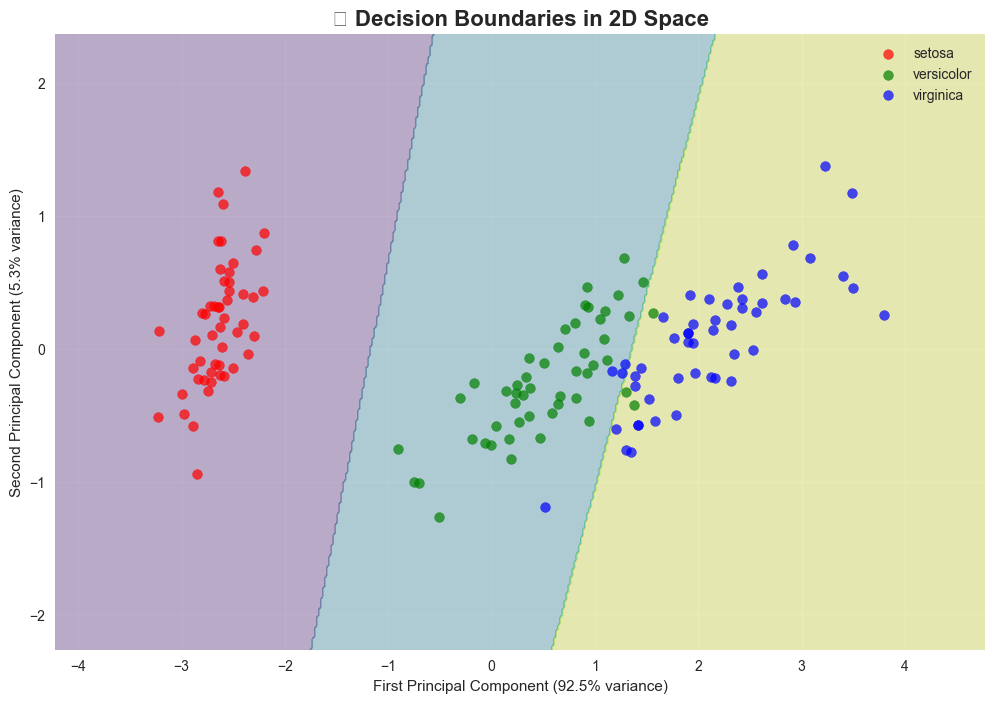

🎨 This visualization shows how the model creates decision boundaries
to separate different classes in the feature space!

📈 Total variance explained by 2D projection: 97.8%


In [11]:
# Final visualization: Decision boundary (2D projection)
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
X_train_2d = pca.transform(X_train)
X_test_2d = pca.transform(X_test)

# Train a simple model on 2D data
simple_model = LogisticRegression()
simple_model.fit(X_train_2d, y_train)

# Create decision boundary
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = simple_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot data points
colors = ['red', 'green', 'blue']
for i, species in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], 
               c=colors[i], label=species, s=50, alpha=0.7)

plt.title('🎯 Decision Boundaries in 2D Space', fontsize=16, fontweight='bold')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("🎨 This visualization shows how the model creates decision boundaries")
print("to separate different classes in the feature space!")
print(f"\n📈 Total variance explained by 2D projection: {sum(pca.explained_variance_ratio_):.1%}")

## 🎉 Congratulations!

You've successfully solved the iris flower classification problem using supervised learning! 

### 🎯 What We Accomplished:

✅ **Solved a Real Problem**: Built an automated system to classify iris flowers

✅ **Applied Supervised Learning**: Used labeled data to train intelligent models

✅ **Compared Algorithms**: 
- **Logistic Regression**: Simple, fast, interpretable
- **Random Forest**: More complex, handles non-linear patterns, provides feature importance

✅ **Understood the Process**: Data → Training → Evaluation → Prediction

✅ **Gained Insights**: Discovered which flower measurements matter most

### 🧠 Key Supervised Learning Concepts Mastered:

🔹 **Labeled Training Data**: Using known examples to teach the model

🔹 **Train-Test Split**: Keeping some data hidden to test real-world performance

🔹 **Model Evaluation**: Using accuracy, confusion matrices, and confidence scores

🔹 **Algorithm Selection**: Choosing the right tool for the job

🔹 **Feature Importance**: Understanding what the model learned

### 🚀 Why This Matters:

This same approach powers:
- 📧 Email spam detection
- 🏥 Medical diagnosis systems  
- 🛒 Product recommendation engines
- 🚗 Autonomous vehicle recognition
- 💰 Fraud detection systems

**Try modifying the code above to:**
- Use different train-test split ratios (70/30, 60/40)
- Try other algorithms (SVM, Decision Trees, KNN)
- Experiment with feature selection (use only 2-3 measurements)
- Test with your own flower measurements!
- Apply this to other datasets (wine quality, housing prices, etc.)

You're now ready to tackle more complex supervised learning challenges! 🌟